### ECE/CS/ISyE 524 &mdash; Introduction to Optimization ###

# Ship Route Optimization #

#### Ahmed Alam Ansari (aansari4@wisc.edu), Manoj Arulmurugan (arulmurugan@wisc.edu) and Sarthak Choudhary (email address)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Base Problem and Issues](#1.1-Base-Problem-and-Issues)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

1. What?

Freight ships are an important part of global trade today with total merchant ship count estimated to be around 100,000 today [https://www.atlas-mag.net/en/category/tags/focus/the-world-merchant-fleet]. It is important in terms of time, cost and profitability to optimize the route that a merchant ship must take from its port of origin to all the ports that it must call upon.

In real life, there is a variety of objectives and constraints that define this interesting optimization problem. For example, a freight company may prioritize minimizing the fuel cost while ensuring that a ship visits all the ports on its list. There could be certain constraints such as the maximum distance the ship is allowed to travel between ports before it must refuel, or certain regions that it must avoid because of inclement weather, hostile waters, high levies, or congestion. It is also common for ships to exploit natural currents or, for sail-driven ships, to utilize wind directions to save on fuel and/or save time between its calls.

This problem is a variant of the **travelling salesman problem (TSP)**, although in this case, the underlying application, challenges and variety of possibilities is different from the classical problem. Discuss and describe differences.???

What's being used in the industry and algorithms. Citations???

In this project, we limit ourselves to a few interesting variants of this problem in the context of ship route optimization. We start of with a basic model to validate our ideas and iron out issues with the constraints and visualization. Some of these constraints (and their remedies) are described under their respective mathematical model.

## 2. Mathematical model ##

We define the problem on an $n \times n$ grid of points. These points are traversable by a ship and are defined by a node index *and* a tuple of coordinates (x, y). There is a one-to-one mapping between a node index and its coordinates. These nodes can take the form of any of the following:
1. port of origin (POO) - this is where a ship starts its journey
2. ports to call on - $m$ ports that a ship must visit
3. no-go zone - $k$ nodes that a ship may not visit at all or that a ship may incur a penalty when passing through these nodes
4. boost-zone - $b$ nodes that have a lower edge cost and incentivize a ship to pass through it
5. a normal node - this is just a plain node which is none of the above

The number of ports to call-on, no-go zones and boost-zones are user-defined, and we use a randomizer function to assign a type to each node. Therefore, all data is user-input or randomized.

In the image below, the red star represents the port of origin, green circles represent ports, crosses represent no-go zones and the pink translucent dots represent the rest of the nodes. The yellow arrowed lines show a possible ship path. Boost-zones are described later.

![image.png](attachment:df29cade-5e90-429c-89c0-a901ce33bf2c.png)

This representation has the potential to be extended to an actual geographical maritime map as well, and allows ready visualization.

Next, we define the mathematical model and the rationale behind the variables, constraints and objective function for the base model and build up complex models from there.

### 1.1 Base Problem and Issues ###
We impose a few constraints on our basic problem:
1. There is only one ship and only on port of origin
2. The ship must call on *all* the ports defined
3. The ship cannot revisit a port and it cannot return to the port of origin
4. No-go zones cannot be visited
5. The ship is only allowed to travel to the nearest 8 points around it on the grid, i.e. only to the points in a square around it.

#### Mathematical representation
**Sets**

**Decision variables**
$$x_{ij} \quad \text{from node } i \text{ to } j \quad | \quad  x_{ij} \in \{0, 1\} \quad \forall i, j$$

\begin{equation}
x_{ij} =
    \begin{cases}
        0, & \text{if path } ij  \text{ is not on the ship route}\\
        1, & \text{if path } ij \text{ is on the ship route}
    \end{cases}
\end{equation}

$$u_{i} \quad \text {for node } i \quad | \quad  u_{i} \geq 0 \quad \forall i$$

The variable $u$ is a continuous variable for each node and ensures that there are no loops in the ship's route.

**Constraints**

1. There is a single outflow from the port of origin, and there is no inflow to the port of origin.
$$\sum_{j \in nodes} x_{poo,j} = 1$$
$$\sum_{i \in nodes} x_{i,poo} = 0$$

2. Each port is visited once (single inflow), and outflow must be less than or equal to the inflow (less than if port is the terminal port).
$$\sum_{i \in nodes} x_{ip} = 1  \quad \text{for } p \in \text{ports} \quad \forall i, j$$
$$\sum_{j \in nodes} x_{pj} \leq \sum_{i \in nodes} x_{ip}   \quad \text{for } p \in \text{ports} \quad \forall i, j$$

3. Do not allow opposite flow for ports
$$x_{ip} + x_{pi} \leq 1  \quad \text{for } p \in \text{ports} \quad \forall i$$

5. No-go zones cannot be visited
$$\sum_{i \in nodes} x_{ig} = 0  \quad \text{for } g \in \text{no-go zones} \quad \forall i, j$$
$$\sum_{j \in nodes} x_{gj} = 0  \quad \text{for } g \in \text{no-go zones} \quad \forall i, j$$

6. Flow is conserved in all other nodes
$$\sum_{i \in nodes} x_{ia} = sum_{j \in nodes} x_{aj}  \quad \text{for } g \in \text{all other nodes} \quad \forall i, j$$

7. Allow only some edges

    Let $c_{ij}$ be the edge cost from node $i$ to $j$ defined by the norm distance. Then,

$$x_{ij} = 0 \quad \text{for all } i, j \text{ where } c_{ij} \geq \sqrt 2 $$

This ensures that a ship only travels to the 8 closest nodes from its current node.

9. MTZ

    The Miller Tucker Zemlin (MTZ) constraint ensures that there is a single path only and prevents any loops.

$$u_i-u_j \geq N(x_{ij} -1)$$
$$u_{poo} = 0$$

For a loop, this constraint is violated. For example, if there is a loop between nodes A, B and C, the MTZ constraint requires that $u_A > u_B > u_C > u_A$ which is not possible.

#### Initial limitations ####

Without the MTZ constraint, we tried a number of constraints to 


## Solution

In [64]:
# Initializing Gurobi:

#=using Pkg
Pkg.add("Gurobi")
Pkg.build("Gurobi")=#

In [65]:
# Add packages here:

#=Pkg.add("Distributions")
Pkg.add("StatsBase")
Pkg.add("Juniper")
Pkg.add("PyPlot")
Pkg.add("MeshGrid")
Pkg.add("COSMO")
Pkg.add("StatsBase")
Pkg.add("LinearAlgebra")
Pkg.add("Random")
Pkg.add("Ipopt")
Pkg.add("Juniper")
Pkg.add("Printf")=#

In [1]:
using PyPlot, MeshGrid, StatsBase, LinearAlgebra, Random, Distributions

In [2]:
using JuMP, GLPK, COSMO, Gurobi, Juniper, Ipopt, Printf

### Helper Functions

In [3]:
function nodeToNum(node, n)
   return node[1]*n+node[2];
end

nodeToNum (generic function with 1 method)

In [4]:
function nodeToCoord(node, spacing)
   return spacing*node
end

nodeToCoord (generic function with 1 method)

In [5]:
function numToCoord(num, n, spacing)
    node_y = div.(num, n);
    node_x = num.%n;
    node = hcat(node_x, node_y);
    return spacing*node;
end

numToCoord (generic function with 1 method)

In [6]:
function numToNode(num, n)
    node_y = div.(num, n);
    node_x = num.%n;
    node = hcat(node_x, node_y);
    return node;
end

numToNode (generic function with 1 method)

In [7]:
function initializeParam(n, spacing, m, k, b, fill_ratio = 0.25)
    grid_size = n*n;
       
    # Check that values are whole numbers
    if m <= 1
        error("Increase m!")
    end
    
    # Check that values are whole numbers
    if !isinteger(n) || !isinteger(m) || !isinteger(k) || !isinteger(0)
        error("Only integer values are allowed for n, m and k!")
    end
        
    # Check that number of ports and no-go zones does not exceed a certain percentage of grid size
    if (b + k + m) >= fill_ratio*grid_size
        error("Number of ports and no-go zones cannot exceed $(fill_ratio*100)% of grid size. Reinitialize numnber of ports!")
    end
    
    grid_data = [n, spacing, m, k, b];
end

initializeParam (generic function with 2 methods)

In [8]:
function initializeParam_(n, spacing, m, k)
    grid_size = n*n;
       
    # Check that values are whole numbers
    if m <= 1
        error("Increase m!")
    end
    
    # Check that values are whole numbers
    if !isinteger(n) || !isinteger(m) || !isinteger(k)
        error("Only integer values are allowed for n, m and k!")
    end
        
    # Check that number of ports and no-go zones does not exceed a certain percentage of grid size
    fill_ratio = 0.25
    if (k + m) >= fill_ratio*grid_size
        error("Number of ports and no-go zones cannot exceed $(fill_ratio*100)% of grid size. Reinitialize numnber of ports!")
    end
    
    grid_data = [n, spacing, m, k];
end

initializeParam_ (generic function with 1 method)

In [9]:
function randomizePorts(grid_data)
### randomize location of all ports and no-go zones
   
    n = Int(grid_data[1]);
    spacing = grid_data[2];
    m = Int(grid_data[3]);
    k = Int(grid_data[4]);

    # assign nodes to ports and no-go zones
    node = rand(0:n-1, m+k, 2);
    coord = spacing*node;

    port_coord = coord[1:m, :]
    no_go_coord = coord[m+1:end, :];

    # assign random port as port of origin
    rand_idx = rand(1:m);
    port_of_origin_coord = port_coord[rand_idx, :]

    return port_coord, no_go_coord, port_of_origin_coord
    
end

randomizePorts (generic function with 1 method)

In [10]:
function randomizePortsNoRepeat(grid_data)
### randomize location of all ports and no-go zones
   
    n = Int(grid_data[1]);
    spacing = grid_data[2];
    m = Int(grid_data[3]);
    k = Int(grid_data[4]);

    total_nodes = n^2;
    pool = 0:(total_nodes-1);

    # assign nodes to ports and no-go zones
    nums = sample(pool, m+k, replace=false);
    port_num = nums[1:m, :];
    no_go_num = nums[m+1:end, :];
    
    # node = hcat(node_x, node_y)
    # coord = spacing*node;

    # port_node = numToNode(port_num, n);
    # port_coord = spacing*port_node;
    # no_go_node = numToNode(no_go_num, n);
    # no_go_coord = spacing*no_go_node;

    # assign random port as port of origin
    rand_idx = rand(1:m);
    port_of_origin_num = port_num[rand_idx];
    # port_of_origin_node = numToNode(port_of_origin_num, n);
    # port_of_origin_coord = spacing*port_of_origin_node;

    return port_num, port_of_origin_num, no_go_num
    
end

randomizePortsNoRepeat (generic function with 1 method)

In [11]:
function randomizePortsBoostZones(grid_data)
### randomize location of all ports and no-go zones and boost zones
   
    n = Int(grid_data[1]);
    spacing = grid_data[2];
    m = Int(grid_data[3]);
    k = Int(grid_data[4]); # no-go 
    b = Int(grid_data[5]); # boost zones

    total_nodes = n^2;
    pool = 0:(total_nodes-1);

    # assign nodes to ports and no-go zones
    nums = sample(pool, m + k + b, replace=false);
    port_num = nums[1:m, :];
    no_go_num = nums[m+1:m+k, :];
    boost_num = nums[m+k+1:end, :];
    
    # node = hcat(node_x, node_y)
    # coord = spacing*node;

    # port_node = numToNode(port_num, n);
    # port_coord = spacing*port_node;
    # no_go_node = numToNode(no_go_num, n);
    # no_go_coord = spacing*no_go_node;

    # assign random port as port of origin
    rand_idx = rand(1:m);
    port_of_origin_num = port_num[rand_idx];
    # port_of_origin_node = numToNode(port_of_origin_num, n);
    # port_of_origin_coord = spacing*port_of_origin_node;

    return port_num, port_of_origin_num, no_go_num, boost_num
    
end

randomizePortsBoostZones (generic function with 1 method)

In [12]:
function generatePortPriorities(port_num, port_of_origin_num)
    visiting_ports = filter(p -> p != port_of_origin_num, port_num)
    
    port_priority = Dict{Int, Int}()
    for (priority_idx, port) in enumerate(visiting_ports)
        port_priority[port] = priority_idx
    end

    return port_priority
end

generatePortPriorities (generic function with 1 method)

In [13]:
function printVisitOrder(port_num, port_of_origin_num, y_opt)
    port_visit_order = []

    for idx in 1:length(port_num)
        port = port_num[idx]
        if port != port_of_origin_num
            push!(port_visit_order, (y_opt[idx], port))
        end
    end

    # Sort by visit order (y_opt values)
    sorted_ports = sort(port_visit_order, by=x->x[1])

    println("\n--- Port Visit Order ---")
    for (visit_num, port_id) in sorted_ports
        println("Visit port ", port_id, " at order ", visit_num)
    end
    println("------------------------\n")
end


printVisitOrder (generic function with 1 method)

In [14]:
function randomizePortProfit(grid_data, min_val, max_val)
# Randomize profit for each port    
    m = Int(grid_data[3]);

    return min_val .+ (max_val - min_val) .* rand(m);
end

randomizePortProfit (generic function with 1 method)

In [15]:
function visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, soln)
    n = Int(grid_data[1]);
    spacing = grid_data[2];
    origin = [0, 0];

    port_coord = numToCoord(port_num, n, spacing);
    port_of_origin_coord = numToCoord(port_of_origin_num, n, spacing);
    no_go_coord = numToCoord(no_go_num, n, spacing);

    grid_size = n^2;

    grid_points_x = [origin[1] + i*spacing for i in range(0, n-1)];
    grid_points_y = [origin[2] + j*spacing for j in range(0, n-1)];

    grid_points_x, grid_points_y = meshgrid(grid_points_x, grid_points_y);
    # size(grid_points_mesh);

    grid_points = hcat(grid_points_x, grid_points_y);
    # grid_points = [grid_points_x, grid_points_y];
    size(grid_points);

    # plot
    grid_color_RGB = [248, 131, 121]./255;
    alpha_plot = 0.5;
    fig_size = max((10,10),(n, n));
    f = figure(figsize=(5, 5));
    scatter(grid_points_x, grid_points_y, alpha = alpha_plot, color = grid_color_RGB, s = 20);
    ax = gca();
    ax.axis("equal");
    ax.axis("off"); # hide axes spines/values

    # plot port data
    port_color_RGB = [25, 100, 50]./255;
    alpha_port = 1;
    scatter(port_coord[:, 1], port_coord[:, 2], alpha = alpha_port, color = port_color_RGB, marker = "o", s = 100);

    # plot no_go data
    no_go_color_RGB = [0, 0, 0]./255;
    alpha_no_go = 1;
    scatter(no_go_coord[:, 1], no_go_coord[:, 2], alpha = alpha_no_go, color = no_go_color_RGB, marker = "x", s = 150);

    # plot port of origin
    origin_port_color_RGB = [255, 87, 51]./255;
    alpha_origin_port = 1;
    scatter(port_of_origin_coord[1], port_of_origin_coord[2], alpha = alpha_origin_port, color = origin_port_color_RGB, marker = "*", s = 200);

    if soln != 0
        # plot edges
        for i=0:grid_size-1
            for j=0:grid_size-1
                if soln[i+1, j+1] == 1
                    # println(soln[i+1, j+1])
                    line_start = numToCoord(i, n, spacing);
                    line_end = numToCoord(j, n, spacing);

                    # println(line_start);
                    # println(line_end);
    
                    # plot([line_start[1], line_end[1]], [line_start[2], line_end[2]], "r-")
                    arrow(line_start[1], line_start[2],  line_end[1]-line_start[1], line_end[2]- line_start[2], head_width=0.2, head_length=0.2, fc="lightyellow", ec="orange")
                end
            end
        end
    end

    # plot([0, 1], [1, 2], "r-")
    return f 
end

visualizeGrid (generic function with 1 method)

In [16]:
function visualizeGridBoost(grid_data, port_num, port_of_origin_num, no_go_num, boost_num, soln)
    n = Int(grid_data[1]);
    spacing = grid_data[2];
    origin = [0, 0];

    port_coord = numToCoord(port_num, n, spacing);
    port_of_origin_coord = numToCoord(port_of_origin_num, n, spacing);
    no_go_coord = numToCoord(no_go_num, n, spacing);
    boost_coord = numToCoord(boost_num, n, spacing);

    grid_size = n^2;

    grid_points_x = [origin[1] + i*spacing for i in range(0, n-1)];
    grid_points_y = [origin[2] + j*spacing for j in range(0, n-1)];

    grid_points_x, grid_points_y = meshgrid(grid_points_x, grid_points_y);
    # size(grid_points_mesh);

    grid_points = hcat(grid_points_x, grid_points_y);
    # grid_points = [grid_points_x, grid_points_y];
    size(grid_points);

    # plot
    grid_color_RGB = [248, 131, 121]./255;
    alpha_plot = 0.5;
    fig_size = max((10,10),(n, n));
    f = figure(figsize=(5, 5));
    scatter(grid_points_x, grid_points_y, alpha = alpha_plot, color = grid_color_RGB, s = 20);
    ax = gca();
    ax.axis("equal");
    ax.axis("off"); # hide axes spines/values

    # plot port data
    port_color_RGB = [25, 100, 50]./255;
    alpha_port = 1;
    scatter(port_coord[:, 1], port_coord[:, 2], alpha = alpha_port, color = port_color_RGB, marker = "o", s = 100);

    # plot no_go data
    no_go_color_RGB = [250, 0, 0]./255;
    alpha_no_go = 1;
    scatter(no_go_coord[:, 1], no_go_coord[:, 2], alpha = alpha_no_go, color = no_go_color_RGB, marker = "v", s = 50);

    # plot boost data
    if b != 0
        boost_color_RGB = [0, 0, 255]./255;
        alpha_boost = 1;
        scatter(boost_coord[:, 1], boost_coord[:, 2], alpha = alpha_boost, color = boost_color_RGB, marker = "^", s = 50);
    end
    
    # plot port of origin
    origin_port_color_RGB = [255, 87, 51]./255;
    alpha_origin_port = 1;
    scatter(port_of_origin_coord[1], port_of_origin_coord[2], alpha = alpha_origin_port, color = origin_port_color_RGB, marker = "*", s = 200);

    if soln != 0
        # plot edges
        for i=0:grid_size-1
            for j=0:grid_size-1
                if soln[i+1, j+1] == 1
                    # println(soln[i+1, j+1])
                    line_start = numToCoord(i, n, spacing);
                    line_end = numToCoord(j, n, spacing);

                    # println(line_start);
                    # println(line_end);
    
                    # plot([line_start[1], line_end[1]], [line_start[2], line_end[2]], "r-")
                    arrow(line_start[1], line_start[2],  line_end[1]-line_start[1], line_end[2]- line_start[2], head_width=0.2, head_length=0.2, fc="lightyellow", ec="orange")
                end
            end
        end
    end

    # plot([0, 1], [1, 2], "r-")
    return f 
end

visualizeGridBoost (generic function with 1 method)

In [17]:
function visualizeGridWithEdges(grid_data, port_num, port_of_origin_num, no_go_num, soln, c)
    n = Int(grid_data[1])
    spacing = grid_data[2]
    origin = [0, 0]

    port_coord = numToCoord(port_num, n, spacing)
    port_of_origin_coord = numToCoord(port_of_origin_num, n, spacing)
    no_go_coord = numToCoord(no_go_num, n, spacing)

    grid_size = n^2

    grid_points_x = [origin[1] + i*spacing for i in range(0, n-1)]
    grid_points_y = [origin[2] + j*spacing for j in range(0, n-1)]
    
    grid_points_x, grid_points_y = meshgrid(grid_points_x, grid_points_y)

    #Plot setup:
    f = figure(figsize=(30, 30))
    scatter(grid_points_x, grid_points_y, alpha=0.5, color=[248, 131, 121] ./ 255, s=250)
    ax = gca()
    ax.axis("equal")
    ax.axis("off")

    scatter(port_coord[:, 1], port_coord[:, 2], alpha=1, color=[25, 100, 50] ./ 255, marker="*", s=600)

    scatter(no_go_coord[:, 1], no_go_coord[:, 2], alpha=1, color=[0, 0, 0], marker="x", s=520, linewidths=2)

    scatter(port_of_origin_coord[1], port_of_origin_coord[2], alpha=1, color=[255, 87, 51] ./ 255, marker="*", s=700)

    base_shift = 0.25   #Along the line
    second_shift = 0.25 #A bit further along the line
    
    for i = 0:grid_size-1
        for j = 0:grid_size-1
            if i < j && c[i+1, j+1] > 0
                node_i = numToNode(i, n)
                node_j = numToNode(j, n)
    
                if abs(node_i[1] - node_j[1]) <= 1 && abs(node_i[2] - node_j[2]) <= 1
                    line_start = numToCoord(i, n, spacing)
                    line_end = numToCoord(j, n, spacing)
    
                    plot([line_start[1], line_end[1]],
                         [line_start[2], line_end[2]],
                         color="black", alpha=0.3, linewidth=1)
    
                    #Midpoint:
                    mid_x = (line_start[1] + line_end[1]) / 2
                    mid_y = (line_start[2] + line_end[2]) / 2
    
                    #Line direction unit vector:
                    dx = line_end[1] - line_start[1]
                    dy = line_end[2] - line_start[2]
                    norm_factor = sqrt(dx^2 + dy^2)
                    unit_dx = dx / norm_factor
                    unit_dy = dy / norm_factor
    
                    # First label: shift toward j
                    text(mid_x + base_shift*unit_dx, mid_y + base_shift*unit_dy,
                         @sprintf("↑%.2f", c[i+1, j+1]),
                         fontsize=15, ha="center", va="center", color="blue")
    
                    # Second label: shift toward i
                    text(mid_x - second_shift*unit_dx, mid_y - second_shift*unit_dy,
                         @sprintf("↓%.2f", c[j+1, i+1]),
                         fontsize=15, ha="center", va="center", color="red")
                end
            end
        end
    end
        if soln != 0
            for i = 0:grid_size-1
                for j = 0:grid_size-1
                    if soln[i+1, j+1] == 1
                        line_start = numToCoord(i, n, spacing)
                        line_end = numToCoord(j, n, spacing)
    
                        arrow(line_start[1], line_start[2],
                              line_end[1] - line_start[1],
                              line_end[2] - line_start[2],
                              head_width=0.15, head_length=0.2,
                              fc="black", ec="black")
                    end
                end
            end
        end
    
        return f
    end

visualizeGridWithEdges (generic function with 1 method)

In [18]:
function visualizeGridWithEdgesSol(grid_data, port_num, port_of_origin_num, no_go_num, soln, c)
    n = Int(grid_data[1])
    spacing = grid_data[2]
    origin = [0, 0]

    port_coord = numToCoord(port_num, n, spacing)
    port_of_origin_coord = numToCoord(port_of_origin_num, n, spacing)
    no_go_coord = numToCoord(no_go_num, n, spacing)

    grid_size = n^2

    grid_points_x = [origin[1] + i*spacing for i in range(0, n-1)]
    grid_points_y = [origin[2] + j*spacing for j in range(0, n-1)]
    grid_points_x, grid_points_y = meshgrid(grid_points_x, grid_points_y)

    #Plot setup:
    f = figure(figsize=(5, 5))
    scatter(grid_points_x, grid_points_y, alpha=0.5, color=[248, 131, 121] ./ 255, s=20)
    ax = gca()
    ax.axis("equal")
    ax.axis("off")

    scatter(port_coord[:, 1], port_coord[:, 2], alpha=1, color=[25, 100, 50] ./ 255, marker="*", s=200)

    scatter(no_go_coord[:, 1], no_go_coord[:, 2], alpha=1, color=[0, 0, 0], marker="x", s=120, linewidths=2)

    scatter(port_of_origin_coord[1], port_of_origin_coord[2], alpha=1, color=[255, 87, 51] ./ 255, marker="*", s=300)

    if soln != 0
        for i = 0:grid_size-1
            for j = 0:grid_size-1
                if soln[i+1, j+1] == 1
                    line_start = numToCoord(i, n, spacing)
                    line_end = numToCoord(j, n, spacing)

                    arrow(line_start[1], line_start[2],
                          line_end[1] - line_start[1],
                          line_end[2] - line_start[2],
                          head_width=0.15, head_length=0.2,
                          fc="black", ec="black")

                    #Midpoint:
                    mid_x = (line_start[1] + line_end[1]) / 2
                    mid_y = (line_start[2] + line_end[2]) / 2

                    #Offset the label perpendicular to the edge direction:
                    dx = line_end[1] - line_start[1]
                    dy = line_end[2] - line_start[2]
                    norm_factor = sqrt(dx^2 + dy^2)
                    unit_dx = dx / norm_factor
                    unit_dy = dy / norm_factor

                    #Perpendicular vector:
                    perp_dx = -unit_dy
                    perp_dy = unit_dx

                    label_offset = 0.2

                    text(mid_x + label_offset*perp_dx, mid_y + label_offset*perp_dy,
                         @sprintf("%.2f", c[i+1, j+1]),
                         fontsize=6, ha="center", va="center", color="black")
                end
            end
        end
    end

    return f
end

visualizeGridWithEdgesSol (generic function with 1 method)

In [19]:
using PyPlot
using Printf

function visualizeGridWithPriorities(grid_data, port_num, port_of_origin_num, no_go_num, soln, port_priority)
    clf()  # Clear previous plots

    n = Int(grid_data[1])
    spacing = grid_data[2]
    origin = [0, 0]

    port_coord = numToCoord(port_num, n, spacing)
    port_of_origin_coord = numToCoord(port_of_origin_num, n, spacing)
    no_go_coord = numToCoord(no_go_num, n, spacing)

    grid_size = n^2

    grid_points_x = [origin[1] + i*spacing for i in range(0, n-1)]
    grid_points_y = [origin[2] + j*spacing for j in range(0, n-1)]
    grid_points_x, grid_points_y = meshgrid(grid_points_x, grid_points_y)

    # plot
    grid_color_RGB = [248, 131, 121] ./ 255
    alpha_plot = 0.5
    fig_size = max((10,10), (n, n))
    f = figure(figsize=(5, 5))
    scatter(grid_points_x, grid_points_y, alpha=alpha_plot, color=grid_color_RGB, s=20)
    ax = gca()
    ax.axis("equal")
    ax.axis("off") 

    # plot port data
    port_color_RGB = [25, 100, 50] ./ 255
    alpha_port = 1
    scatter(port_coord[:, 1], port_coord[:, 2], alpha=alpha_port, color=port_color_RGB, marker="*", s=100)

    for idx in 1:length(port_num)
        port_id = port_num[idx]
        if haskey(port_priority, port_id)
            x, y = port_coord[idx, 1], port_coord[idx, 2]
            # Format: "priority (port_id)"
            text(x, y + 0.5, @sprintf("%d (%d)", port_priority[port_id], port_id),
                 fontsize=8, ha="center", va="bottom", color="black")
        end
    end

    # plot no_go data
    no_go_color_RGB = [0, 0, 0]
    alpha_no_go = 1
    scatter(no_go_coord[:, 1], no_go_coord[:, 2], alpha=alpha_no_go, color=no_go_color_RGB, marker="x", s=80)

    # plot port of origin (bigger and different color)
    origin_port_color_RGB = [255, 87, 51] ./ 255
    alpha_origin_port = 1
    scatter(port_of_origin_coord[1], port_of_origin_coord[2], alpha=alpha_origin_port, color=origin_port_color_RGB, marker="*", s=200)

    if soln != 0
        # plot solution edges
        for i = 0:grid_size-1
            for j = 0:grid_size-1
                if soln[i+1, j+1] == 1
                    line_start = numToCoord(i, n, spacing)
                    line_end = numToCoord(j, n, spacing)

                    arrow(line_start[1], line_start[2],
                          line_end[1] - line_start[1], line_end[2] - line_start[2],
                          head_width=0.3, head_length=0.3, alpha =0.5,
                          fc="lightyellow", ec="black")
                end
            end
        end
    end

    return f
end

visualizeGridWithPriorities (generic function with 1 method)

### Minimize total distance travelled

In [20]:
function optModelMinCost(grid_data, port_num, port_of_origin_num, no_go_num, solver)
    grid_size = n*n;

    # nodes other than ports and no-go zones
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    # println(all_else_num)
    
    model = Model();
    # all edges from a node to all other nodes
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:m], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    # u is a continuous variable initialized at the port of origin to be 0
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;
    
    # edge cost: euclidean norm
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;

    # Total cost
    cost = 0; 
    
    # idx=0;
    
    # cost and same node flow
    for i = 0:grid_size-1
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end

            # MTZ constraint
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);
    
            # edge cost
            c[i+1, j+1] = norm(numToCoord(i, n, spacing)- numToCoord(j, n, spacing));
            cost += c[i+1, j+1]*x[i, j];
              
            # all edges other than the eight closest ones are zero 
            if c[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end    
        end   
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO==1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1); # or sum in == 0
    
    ## for other ports
    # for if-then constraints
    e = 1;
    l = -1;
    u = 2;
    sum_terminal = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end

            ## if-then constraints
            # @show 
            # @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # @show 
            # @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);
    
            # sum_terminal += z[p];
        end
    end
    # @show 
    # @constraint(model, sum_terminal == 1);
    
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
           
        end
        # @show 
        @constraint(model, sum_out_no_go == 0);
        # @show 
        @constraint(model, sum_in_no_go == 0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    @objective(model, Min, cost);

    set_optimizer(model, solver.Optimizer);
    set_silent(model);
    optimize!(model);

    println(termination_status(model));

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
        
        return x_opt, z_opt, obj_opt, model
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelMinCost (generic function with 1 method)

### Allow ship to pass through no-go zones but assign penalty

In [21]:
function optModelAllowNoGo(grid_data, port_num, port_of_origin_num, no_go_num, penalty_factor, solver)
    grid_size = n*n;

    # nodes other than ports and no-go zones
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    # println(all_else_num)
    
    model = Model();
    # all edges from a node to all other nodes
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:m], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    # u is a continuous variable initialized at the port of origin to be 0
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;
    
    # edge cost: euclidean norm
    norm_dist = zeros(grid_size, grid_size);
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;
    
    cost = 0; 
    
    # idx=0;
    # cost and same node flow
    for i = 0:grid_size-1
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end

            # MTZ constraint
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);
    
            # edge cost
            norm_dist[i+1, j+1] = norm(numToCoord(i, n, spacing) - numToCoord(j, n, spacing));
            c[i+1, j+1] = norm_dist[i+1, j+1];
            
            # If flow coming in or going out of a no-go zone, increase cost by 1.5
            if in(i, no_go_num) || in(j, no_go_num)
                c[i+1, j+1] *= penalty_factor;              
            end

            cost += c[i+1, j+1]*x[i, j];
            
            # all edges other than the eight closest ones are zero 
            if norm_dist[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end    
        end   
        
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO == 1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1);
    
    ## for other ports
    # for if-then constraints
    e = 1; # epsilon
    l = -1; # lower bound
    u = 2; # upper bound
    sum_terminal = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end

            ## if-then constraints
            # @show 
            # @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # # @show 
            # @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);
    
            # sum_terminal += z[p];
        end
    end
    # @show 
    # @constraint(model, sum_terminal == 1);
    
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
        end

        # conserve flow
        @constraint(model, sum_out_no_go - sum_in_no_go ==0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    @objective(model, Min, cost);

    @show model

    set_optimizer(model, solver.Optimizer);
    # set_silent(model);
    optimize!(model);

    println(termination_status(model));

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
            
        return x_opt, z_opt, obj_opt, model
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelAllowNoGo (generic function with 1 method)

### With Boost Zones

In [22]:
function optModelNoGoBoost(grid_data, port_num, port_of_origin_num, no_go_num, boost_num, penalty_factor, boost_factor, solver)
    grid_size = n*n;

    # nodes other than ports and no-go zones
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num, boost_num))
    # println(all_else_num)
    
    model = Model();
    # all edges from a node to all other nodes
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:m], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    # u is a continuous variable initialized at the port of origin to be 0
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;
    
    # edge cost: euclidean norm
    norm_dist = zeros(grid_size, grid_size);
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;
    
    cost = 0; 
    
    # idx=0;
    # cost and same node flow
    for i = 0:grid_size-1
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end

            # MTZ constraint
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);
    
            # edge cost
            norm_dist[i+1, j+1] = norm(numToCoord(i, n, spacing) - numToCoord(j, n, spacing));
            c[i+1, j+1] = norm_dist[i+1, j+1];
            
            # If flow coming going out of a no-go zone, increase cost by penalty factor
            # if in(i, no_go_num) || in(j, no_go_num)
            if in(j, no_go_num)
                c[i+1, j+1] *= penalty_factor;              
            end

             # If flow coming into a boost zone, decrease cost by boost factor
            if in(j, boost_num)
                c[i+1, j+1] /= boost_factor;              
            end

            cost += c[i+1, j+1]*x[i, j];
            
            # all edges other than the eight closest ones are zero 
            if norm_dist[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end    
        end   
        
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO == 1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1);
    
    ## for other ports
    # for if-then constraints
    e = 1; # epsilon
    l = -1; # lower bound
    u = 2; # upper bound
    sum_terminal = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end

            ## if-then constraints
            # @show 
            # @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # # @show 
            # @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);
    
            # sum_terminal += z[p];
        end
    end
    # @show 
    # @constraint(model, sum_terminal == 1);
    
     # for boost zones
    for b=1:length(boost_num)
        i = boost_num[b];
        
        # println(i);
        
        sum_in_boost = 0;
        sum_out_boost = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_boost += x[i, j];
            sum_in_boost += x[j, i];
        
        end

        # conserve flow
        @constraint(model, sum_out_boost - sum_in_boost ==0);
        
    end
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
        end

        # conserve flow
        @constraint(model, sum_out_no_go - sum_in_no_go ==0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    @objective(model, Min, cost);

    @show model

    set_optimizer(model, solver.Optimizer);
    # set_silent(model);
    optimize!(model);

    println(termination_status(model));

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
            
        return x_opt, z_opt, obj_opt, model
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelNoGoBoost (generic function with 1 method)

### Allow any number of ports to be visited >= 1

In [23]:
function optModelMaxProfit(grid_data, port_num, port_of_origin_num, no_go_num, port_profit, solver)
    grid_size = n*n;

    # nodes other than ports and no-go zones
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    # println(all_else_num)
    
    model = Model();
    # all edges from a node to all other nodes
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:length(port_num)], Bin);

    # binary variable to ensure >= 1 ports visited (other than POO)
    @variable(model, w[i = 1:length(port_num)], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    # u is a continuous variable initialized at the port of origin to be 0
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;
    
    # edge cost: euclidean norm
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;

    # Total cost
    cost = 0; 
    
    # idx=0;
    
    # cost and same node flow
    for i = 0:grid_size-1
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end

            # MTZ constraint
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);
    
            # edge cost
            c[i+1, j+1] = norm(numToCoord(i, n, spacing)- numToCoord(j, n, spacing));
            cost += c[i+1, j+1]*x[i, j];
              
            # all edges other than the eight closest ones are zero 
            if c[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end   
        end   
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO==1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1); # or sum in == 0
    
    ## for other ports
    # for if-then constraints
    e = 1;
    l = -1;
    u = 2;
    sum_terminal = 0;
    profit = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end

            ## if-then constraints
            # @show 
            # @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # @show 
            # @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            # @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);

            # Added constraint to esnure >= 1 ports visited; this allows skipping some ports
            @constraint(model, sum_in_port - 1 <= u*w[p] - e*(1-w[p])); # if sum_in >=1, w = 1
            @constraint(model, sum_in_port >= l*(1-w[p]) + e*w[p]); # if sum_in <=0, w = 0

            profit += port_profit[p]*w[p];
            # sum_terminal += z[p];
        else
            @constraint(model, w[p] == 0); # for port of origin, redundant?
        end
    end
    # @show 
    # @constraint(model, sum_terminal == 1);
    
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
           
        end
        # @show 
        @constraint(model, sum_out_no_go == 0);
        # @show 
        @constraint(model, sum_in_no_go == 0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    # @objective(model, Min, cost);
    @objective(model, Max, profit);

    set_optimizer(model, solver.Optimizer);
    set_silent(model);
    optimize!(model);

    println(termination_status(model));

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
        
        return x_opt, z_opt, obj_opt, model
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelMaxProfit (generic function with 1 method)

### Maximized Profit with a max limit between any two ports

In [24]:
function optModelMaxProfitwithMaxDist(grid_data, port_num, port_of_origin_num, no_go_num, port_profit, d_max, solver)
    grid_size = n*n;

    # nodes other than ports and no-go zones
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    # println(all_else_num)
    
    model = Model();
    # all edges from a node to all other nodes
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:length(port_num)], Bin);

    # binary variable to ensure >= 1 ports visited (other than POO)
    @variable(model, w[i = 1:length(port_num)], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    # u is a continuous variable initialized at the port of origin to be 0
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;

    # Port-to-port distance tracking 
    # Track distance since last port for each node 
    @variable(model, d[i=0:grid_size-1] >= 0)
    
    for p in port_num
        @constraint(model, d[p] == 0);
    end
    
    # edge cost: euclidean norm
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;
    # d_max = 7;
    # Total cost
    cost = 0; 
    
    idx=0;
    
    # cost and same node flow
    for i = 0:grid_size-1
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end

            # MTZ constraint
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);
    
            # edge cost
            c[i+1, j+1] = norm(numToCoord(i, n, spacing)- numToCoord(j, n, spacing));
            cost += c[i+1, j+1]*x[i, j];
              
            # all edges other than the eight closest ones are zero 
            if c[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end   
            # update distance tracking between nodes
            # If we travel from i to j, update the distance tracking 
            if !in(j, port_num) # Only needed for non-port grid points
                @constraint(model, d[j] >= d[i] + c[i+1, j+1] - d_max*(1 - x[i,j]));
            end

            # Ensure distance between ports doesn't exceed d_max
            @constraint(model, d[j] <= d_max);
        end   
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO==1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1); # or sum in == 0
    
    ## for other ports
    # for if-then constraints
    e = 1;
    l = -1;
    u = 2;
    sum_terminal = 0;
    profit = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end

            ## if-then constraints
            # @show 
            # @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # @show 
            # @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            # @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);

            # Added constraint to esnure >= 1 ports visited; this allows skipping some ports
            @constraint(model, sum_in_port - 1 <= u*w[p] - e*(1-w[p])); # if sum_in >=1, w = 1
            @constraint(model, sum_in_port >= l*(1-w[p]) + e*w[p]); # if sum_in <=0, w = 0

            profit += port_profit[p]*w[p];
            # sum_terminal += z[p];
        else
            @constraint(model, w[p] == 0); # for port of origin, redundant?
        end
    end
    # @show 
    # @constraint(model, sum_terminal == 1);
    
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
           
        end
        # @show 
        @constraint(model, sum_out_no_go == 0);
        # @show 
        @constraint(model, sum_in_no_go == 0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    # @objective(model, Min, cost);
    @objective(model, Max, profit);

    set_optimizer(model, solver.Optimizer);
    set_silent(model);
    optimize!(model);

    println(termination_status(model));

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
        
        return x_opt, z_opt, obj_opt, model
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelMaxProfitwithMaxDist (generic function with 1 method)

### Initialize parameters

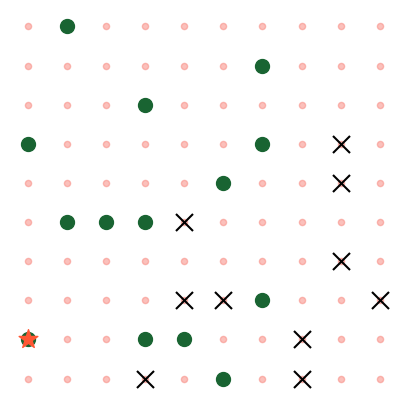

In [60]:
### Grid setup
# grid size (square)
n = 10;
spacing = 1; # always keep 1?

### port information
# number of ports on grid
m = 14;

### no-go zones
k = 10;

# boost zones
b = 0;

grid_data = initializeParam(n, spacing, m, k, b, 0.95);
port_num, port_of_origin_num, no_go_num = randomizePortsNoRepeat(grid_data)
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num,  0);

### Solve Model

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL
Objective value: 28.55634918610405


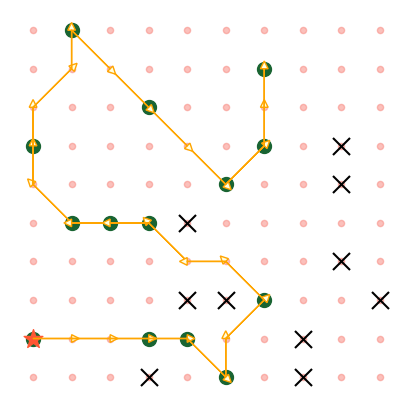

In [61]:
solver = Gurobi;
x_opt, z_opt, obj_opt = optModelMinCost(grid_data, port_num, port_of_origin_num, no_go_num, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

model = A JuMP Model
├ solver: none
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 10114
├ num_constraints: 30845
│ ├ AffExpr in MOI.EqualTo{Float64}: 9418
│ ├ AffExpr in MOI.LessThan{Float64}: 11313
│ ├ VariableRef in MOI.GreaterThan{Float64}: 100
│ └ VariableRef in MOI.ZeroOne: 10014
└ Names registered in the model
  └ :u, :x, :z
Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 23.6.0 23H527)

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20731 rows, 10114 columns and 62904 nonzeros
Model fingerprint: 0x1bbad8ed
Variable types: 100 continuous, 10014 integer (10014 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+01]
  Bounds range     [0e+00, 0e+0

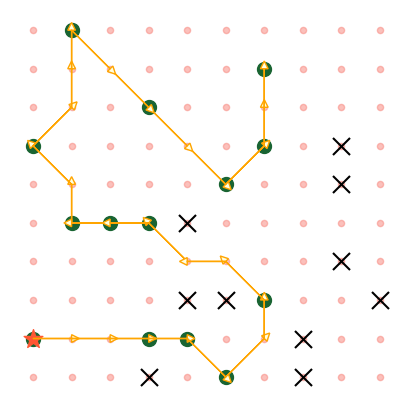

In [62]:
solver = Gurobi;
penalty_factor = 1.0;
x_opt, z_opt, obj_opt = optModelAllowNoGo(grid_data, port_num, port_of_origin_num, no_go_num, penalty_factor, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

model = A JuMP Model
├ solver: none
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 10114
├ num_constraints: 30845
│ ├ AffExpr in MOI.EqualTo{Float64}: 9418
│ ├ AffExpr in MOI.LessThan{Float64}: 11313
│ ├ VariableRef in MOI.GreaterThan{Float64}: 100
│ └ VariableRef in MOI.ZeroOne: 10014
└ Names registered in the model
  └ :u, :x, :z
Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 23.6.0 23H527)

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20731 rows, 10114 columns and 62904 nonzeros
Model fingerprint: 0x3d60d8e8
Variable types: 100 continuous, 10014 integer (10014 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 2e+01]
  Bounds range     [0e+00, 0e+0

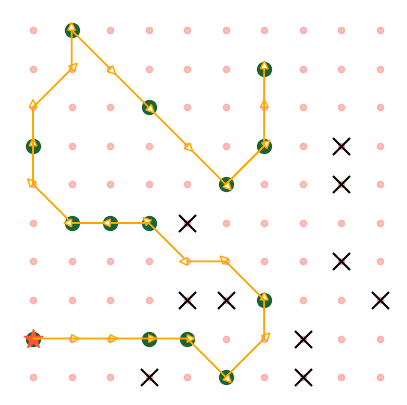

In [63]:
solver = Gurobi;
penalty_factor = 2;
x_opt, z_opt, obj_opt = optModelAllowNoGo(grid_data, port_num, port_of_origin_num, no_go_num, penalty_factor, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

model = A JuMP Model
├ solver: none
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 10114
├ num_constraints: 30845
│ ├ AffExpr in MOI.EqualTo{Float64}: 9418
│ ├ AffExpr in MOI.LessThan{Float64}: 11313
│ ├ VariableRef in MOI.GreaterThan{Float64}: 100
│ └ VariableRef in MOI.ZeroOne: 10014
└ Names registered in the model
  └ :u, :x, :z
Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 23.6.0 23H527)

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20731 rows, 10114 columns and 62904 nonzeros
Model fingerprint: 0x706f51a6
Variable types: 100 continuous, 10014 integer (10014 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+0

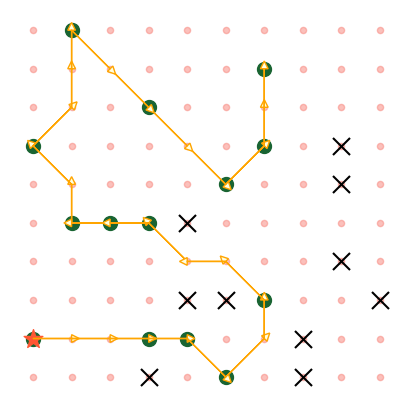

In [64]:
solver = Gurobi;
penalty_factor = 10;
x_opt, z_opt, obj_opt = optModelAllowNoGo(grid_data, port_num, port_of_origin_num, no_go_num, penalty_factor, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

In [65]:
# For if-then conditions
# utilize previous conditions to ensure good constraints

# why can't lines be eliminated by saying sum of ports with one outgoing 1?

### Max profit

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL
Objective value: 76161.81318702137


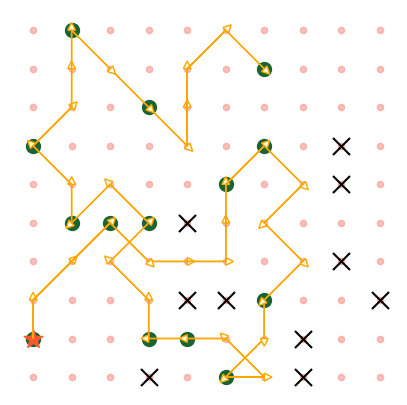

In [66]:
port_profit = randomizePortProfit(grid_data, 1000, 10000);
solver = Gurobi;
x_opt, z_opt, obj_opt = optModelMaxProfit(grid_data, port_num, port_of_origin_num, no_go_num, port_profit, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

### Maximize Profit with limiting Max Distance between two Ports

In [32]:
port_profit = randomizePortProfit(grid_data, 1000, 10000);
solver = Gurobi;
x_opt, z_opt, obj_opt = optModelMaxProfitwithMaxDist(grid_data, port_num, port_of_origin_num, no_go_num, port_profit, 8, solver);
println("Objective value: $(obj_opt)");
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
INFEASIBLE_OR_UNBOUNDED


LoadError: Model did not optimize!

### With Node Boost:

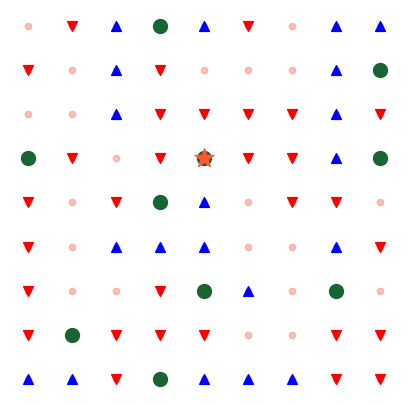

In [33]:
### Grid setup
# grid size (square)
n = 9;
spacing = 1; # always keep 1?

### port information
# number of ports on grid
m = 10;

### no-go zones
k = 30;

# boost zones
b = 20;

grid_data = initializeParam(n, spacing, m, k, b, 0.95);
port_num, port_of_origin_num, no_go_num, boost_num = randomizePortsBoostZones(grid_data)
f = visualizeGridBoost(grid_data, port_num, port_of_origin_num, no_go_num, boost_num, 0);

model = A JuMP Model
├ solver: none
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 6652
├ num_constraints: 20051
│ ├ AffExpr in MOI.EqualTo{Float64}: 6100
│ ├ AffExpr in MOI.LessThan{Float64}: 7299
│ ├ VariableRef in MOI.GreaterThan{Float64}: 81
│ └ VariableRef in MOI.ZeroOne: 6571
└ Names registered in the model
  └ :u, :x, :z
Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 23.6.0 23H527)

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 13399 rows, 6652 columns and 40758 nonzeros
Model fingerprint: 0xb0789cfc
Variable types: 81 continuous, 6571 integer (6571 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e-01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS

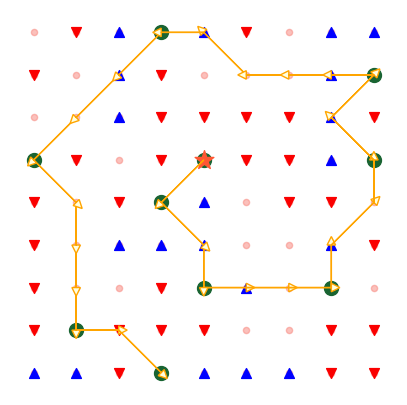

In [34]:
penalty_factor = 2;
boost_factor = 2;
x_opt, z_opt, obj_opt = optModelNoGoBoost(grid_data, port_num, port_of_origin_num, no_go_num, boost_num, penalty_factor, boost_factor, solver)
println("Objective value: $(obj_opt)");
f = visualizeGridBoost(grid_data, port_num, port_of_origin_num, no_go_num, boost_num, x_opt.data);

### Edge Boost/Hindrances:

In this section, we investigate how introducing random edge boosts and hindrances affects the optimal shipping routes. The goal is to minimize the total travel distance while accounting for environmental factors like ocean currents, which can either speed up or slow down the ship on specific edges.

We use two main functions:

- `optModelMinCostWithEdges`: Builds and solves the optimization problem where the cost of each edge has a random upstream ($i \to j$) and downstream ($j \to i$) adjustment.
- `visualizeGridWithEdgesSol`: Visualizes the solution, including edge directions, selected paths, and numerical edge costs.

---

**Edge Update Logic**

For every neighboring node pair $i, j$, we apply:

$$
c_{ij} = d_{ij} \times (1 + k)
$$

$$
c_{ji} = d_{ij} \times (1 - k)
$$

where:

- $d_{ij}$ is the Euclidean distance,
- $k \sim U(-0.9, 0.9)$ is a random boost/hindrance factor.

This ensures upstream and downstream values are complementary, mimicking real-world variability like ocean currents.

---

**Mathematical Model**

Objective:

$$
\min \sum_{i,j} c_{ij} \cdot x_{ij}
$$

Decision variables:

- $x_{ij} \in \{0,1\}$ → 1 if edge $(i,j)$ is used, 0 otherwise.
- $u_i \geq 0$ → auxiliary variables for MTZ subtour elimination.

Constraints:

- **Flow conservation at non-origin nodes:**
  
$$
\sum_j x_{ij} - \sum_j x_{ji} = 0, \quad \forall i \neq \text{origin}
$$

- **Origin node constraints:**

$$
\sum_j x_{\text{origin}, j} = 1, \quad \sum_j x_{j, \text{origin}} = 0
$$

- **Port visit constraints:**

Each port (other than origin) must have exactly one incoming and one outgoing edge.

- **No-go zones:**

$$
\sum_j x_{ig} = \sum_j x_{gi} = 0, \quad \forall g \in \text{no-go zones}
$$

- **Subtour elimination (MTZ constraints):**

$$
u_i - u_j + N \cdot x_{ij} \leq N -1, \quad \forall i, j
$$

where $N$ is the total number of nodes.

---

**Model Type**

This is a **Mixed Integer Program (MIP)** with binary edge decision variables and continuous auxiliary variables for subtour elimination.

---

In [119]:
function optModelMinCostWithEdges(grid_data, port_num, port_of_origin_num, no_go_num, solver)
    grid_size = n*n;
    all_num = [i for i=0:grid_size-1];
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    # println(all_else_num)
    
    model = Model();
    # @show 
    @variable(model, x[i = 0:grid_size-1, j = 0:grid_size-1], Bin);
    # @show 
    @variable(model, z[i = 1:m], Bin);
    
    # MTZ to prevent loops
    # defined for all nodes
    @variable(model, u[i = 0:grid_size-1] >= 0);
    @constraint(model, u[1] == 0) # for POO;
    
    # edge cost: euclidean norm
    c = zeros(grid_size, grid_size);
    
    tol = 10^-5;
    
    cost = 0; 
    
    idx=0;
    # cost and same node flow
    for i = 0:grid_size-1
        sum_out_all_else = 0;
        # println(i);
    
        for j = 0:grid_size-1
            if i == j
                # no flow
                # @show 
                @constraint(model, x[i, j] == 0);
            end
    
            @constraint(model, u[i]- u[j] + grid_size*x[i, j] <= grid_size - 1);


            for i = 0:grid_size-1
                for j = 0:grid_size-1
                    if i != j
                        node_i = numToNode(i, n)
                        node_j = numToNode(j, n)
            
                        #Only for neighboring nodes:
                        if abs(node_i[1] - node_j[1]) <= 1 && abs(node_i[2] - node_j[2]) <= 1
                            base_distance = norm(numToCoord(i, n, spacing) - numToCoord(j, n, spacing))
            
                            if i < j  #Adjusting once per undirected edge
                                boost_or_hindrance = rand(Uniform(-0.99, 0.99))
            
                                # Forward edge i -> j
                                adjusted_forward = base_distance * (1 + boost_or_hindrance)
                                c[i+1, j+1] = adjusted_forward
                                cost += adjusted_forward * x[i, j]
            
                                # Reverse edge j -> i
                                adjusted_backward = base_distance * (1 - boost_or_hindrance)
                                c[j+1, i+1] = adjusted_backward
                                cost += adjusted_backward * x[j, i]
                            end
                        end
                    end
                end
            end
            
            # all edges other than the eight closest ones are zero 
            #=if c[i+1, j+1] > (sqrt(2) + tol)
                @constraint(model, x[i, j] == 0);
            end=#

            #---Alternate logic for allowing travel to closest 8 points---
            node_i = numToNode(i, n)
            node_j = numToNode(j, n)
            
            if abs(node_i[1] - node_j[1]) > 1 || abs(node_i[2] - node_j[2]) > 1
                @constraint(model, x[i, j] == 0)
            end

            
        end
    end
    
    # port of origin
    sum_in_POO = 0;
    sum_out_POO = 0;
    
    for j = 0:grid_size-1
        sum_out_POO += x[port_of_origin_num, j];
        sum_in_POO += x[j, port_of_origin_num]; 
    end
    
    # @show 
    @constraint(model, sum_out_POO==1);
    # @show 
    @constraint(model, sum_out_POO - sum_in_POO == 1);
    
    ## for other ports
    # for if-then constraints
    e = 1;
    l = -1;
    u = 2;
    sum_terminal = 0;
    
    for p=1:length(port_num)
        i = port_num[p];
        if i!=port_of_origin_num
            # println(i);
            sum_in_port = 0;
            sum_out_port = 0;
    
    
    
            for j = 0:grid_size-1
                # port of origin
                sum_out_port += x[i, j];
                sum_in_port += x[j, i];
    
                # if flow from edge is 1, then no flow in the opposite direction
                # @show 
                @constraint(model, x[i, j] + x[j, i] <= 1);
               
            end
            
            # @show 
            @constraint(model, sum_out_port >= l*z[p] +e*(1-z[p]));
            # @show 
            @constraint(model, sum_out_port <= u*(1-z[p]));
            # @show 
            @constraint(model, sum_in_port == 1);
            # @constraint(model, sum_in_port >= 1);
            # @show 
            @constraint(model, sum_out_port - sum_in_port <= 0);
    
            sum_terminal += z[p];
        end
    end
    # @show 
    @constraint(model, sum_terminal == 1);
    
    
    # for no-go zones
    for g=1:length(no_go_num)
        i = no_go_num[g];
        
        # println(i);
        
        sum_in_no_go = 0;
        sum_out_no_go = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_no_go += x[i, j];
            sum_in_no_go += x[j, i];
        
           
        end
        # @show 
        @constraint(model, sum_out_no_go == 0);
        # @show 
        @constraint(model, sum_in_no_go ==0);
        
    end
    
    # for all-else
    for a=1:length(all_else_num)
        i = all_else_num[a];
        
        # println(i);
        
        sum_out_all_else = 0;
        sum_in_all_else = 0;
    
        for j = 0:grid_size-1
            # port of origin
            sum_out_all_else += x[i, j];
            sum_in_all_else += x[j, i];
    
            # if flow from edge is 1, then no flow in the opposite direction
            # @show 
            # @constraint(model, x[i, j] + x[j, i] <= 1);
           
        end
        # @show 
        @constraint(model, sum_out_all_else - sum_in_all_else == 0);
        
    end
    
    #objective function
    @objective(model, Min, cost);

    set_optimizer(model, solver.Optimizer);
    set_silent(model);
    optimize!(model);

    try
        x_opt = JuMP.value.(x);
        z_opt = JuMP.value.(z);
        obj_opt = objective_value(model);
        
        println(termination_status(model));
    
        return x_opt, z_opt, obj_opt, model, c
    catch
    # else
        error("Model did not optimize!")
    end

end

optModelMinCostWithEdges (generic function with 1 method)

In [163]:
### Grid setup
# grid size (square)
n = 10;
spacing = 1;
### port information
# number of ports on grid
m = 14;
### no-go zones
k = 10;
grid_data = initializeParam_(n, spacing, m, k);
port_num, port_of_origin_num, no_go_num = randomizePortsNoRepeat(grid_data)

([15; 86; … ; 80; 8;;], 67, [93; 19; … ; 25; 3;;])

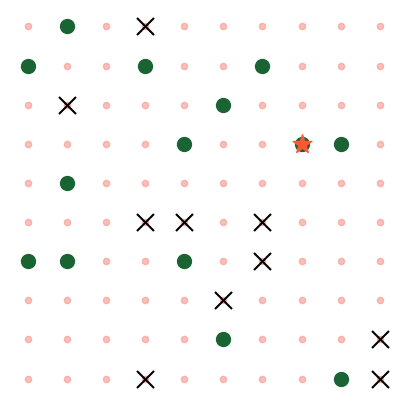

In [164]:
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, 0);

In [165]:
solver = Gurobi;
x_opt, z_opt, obj_opt, model, c = optModelMinCostWithEdges(grid_data, port_num, port_of_origin_num, no_go_num, solver)

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL


(2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, 0:99
    Dimension 2, 0:99
And data, a 100×100 Matrix{Float64}:
  0.0  0.0   0.0  0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0  -0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0  -0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0  -0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 -0.0  0.0   0.0  0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -0.0  0.0  -0.0  0.0   0.0   0.0      0.0   0.0   0.0

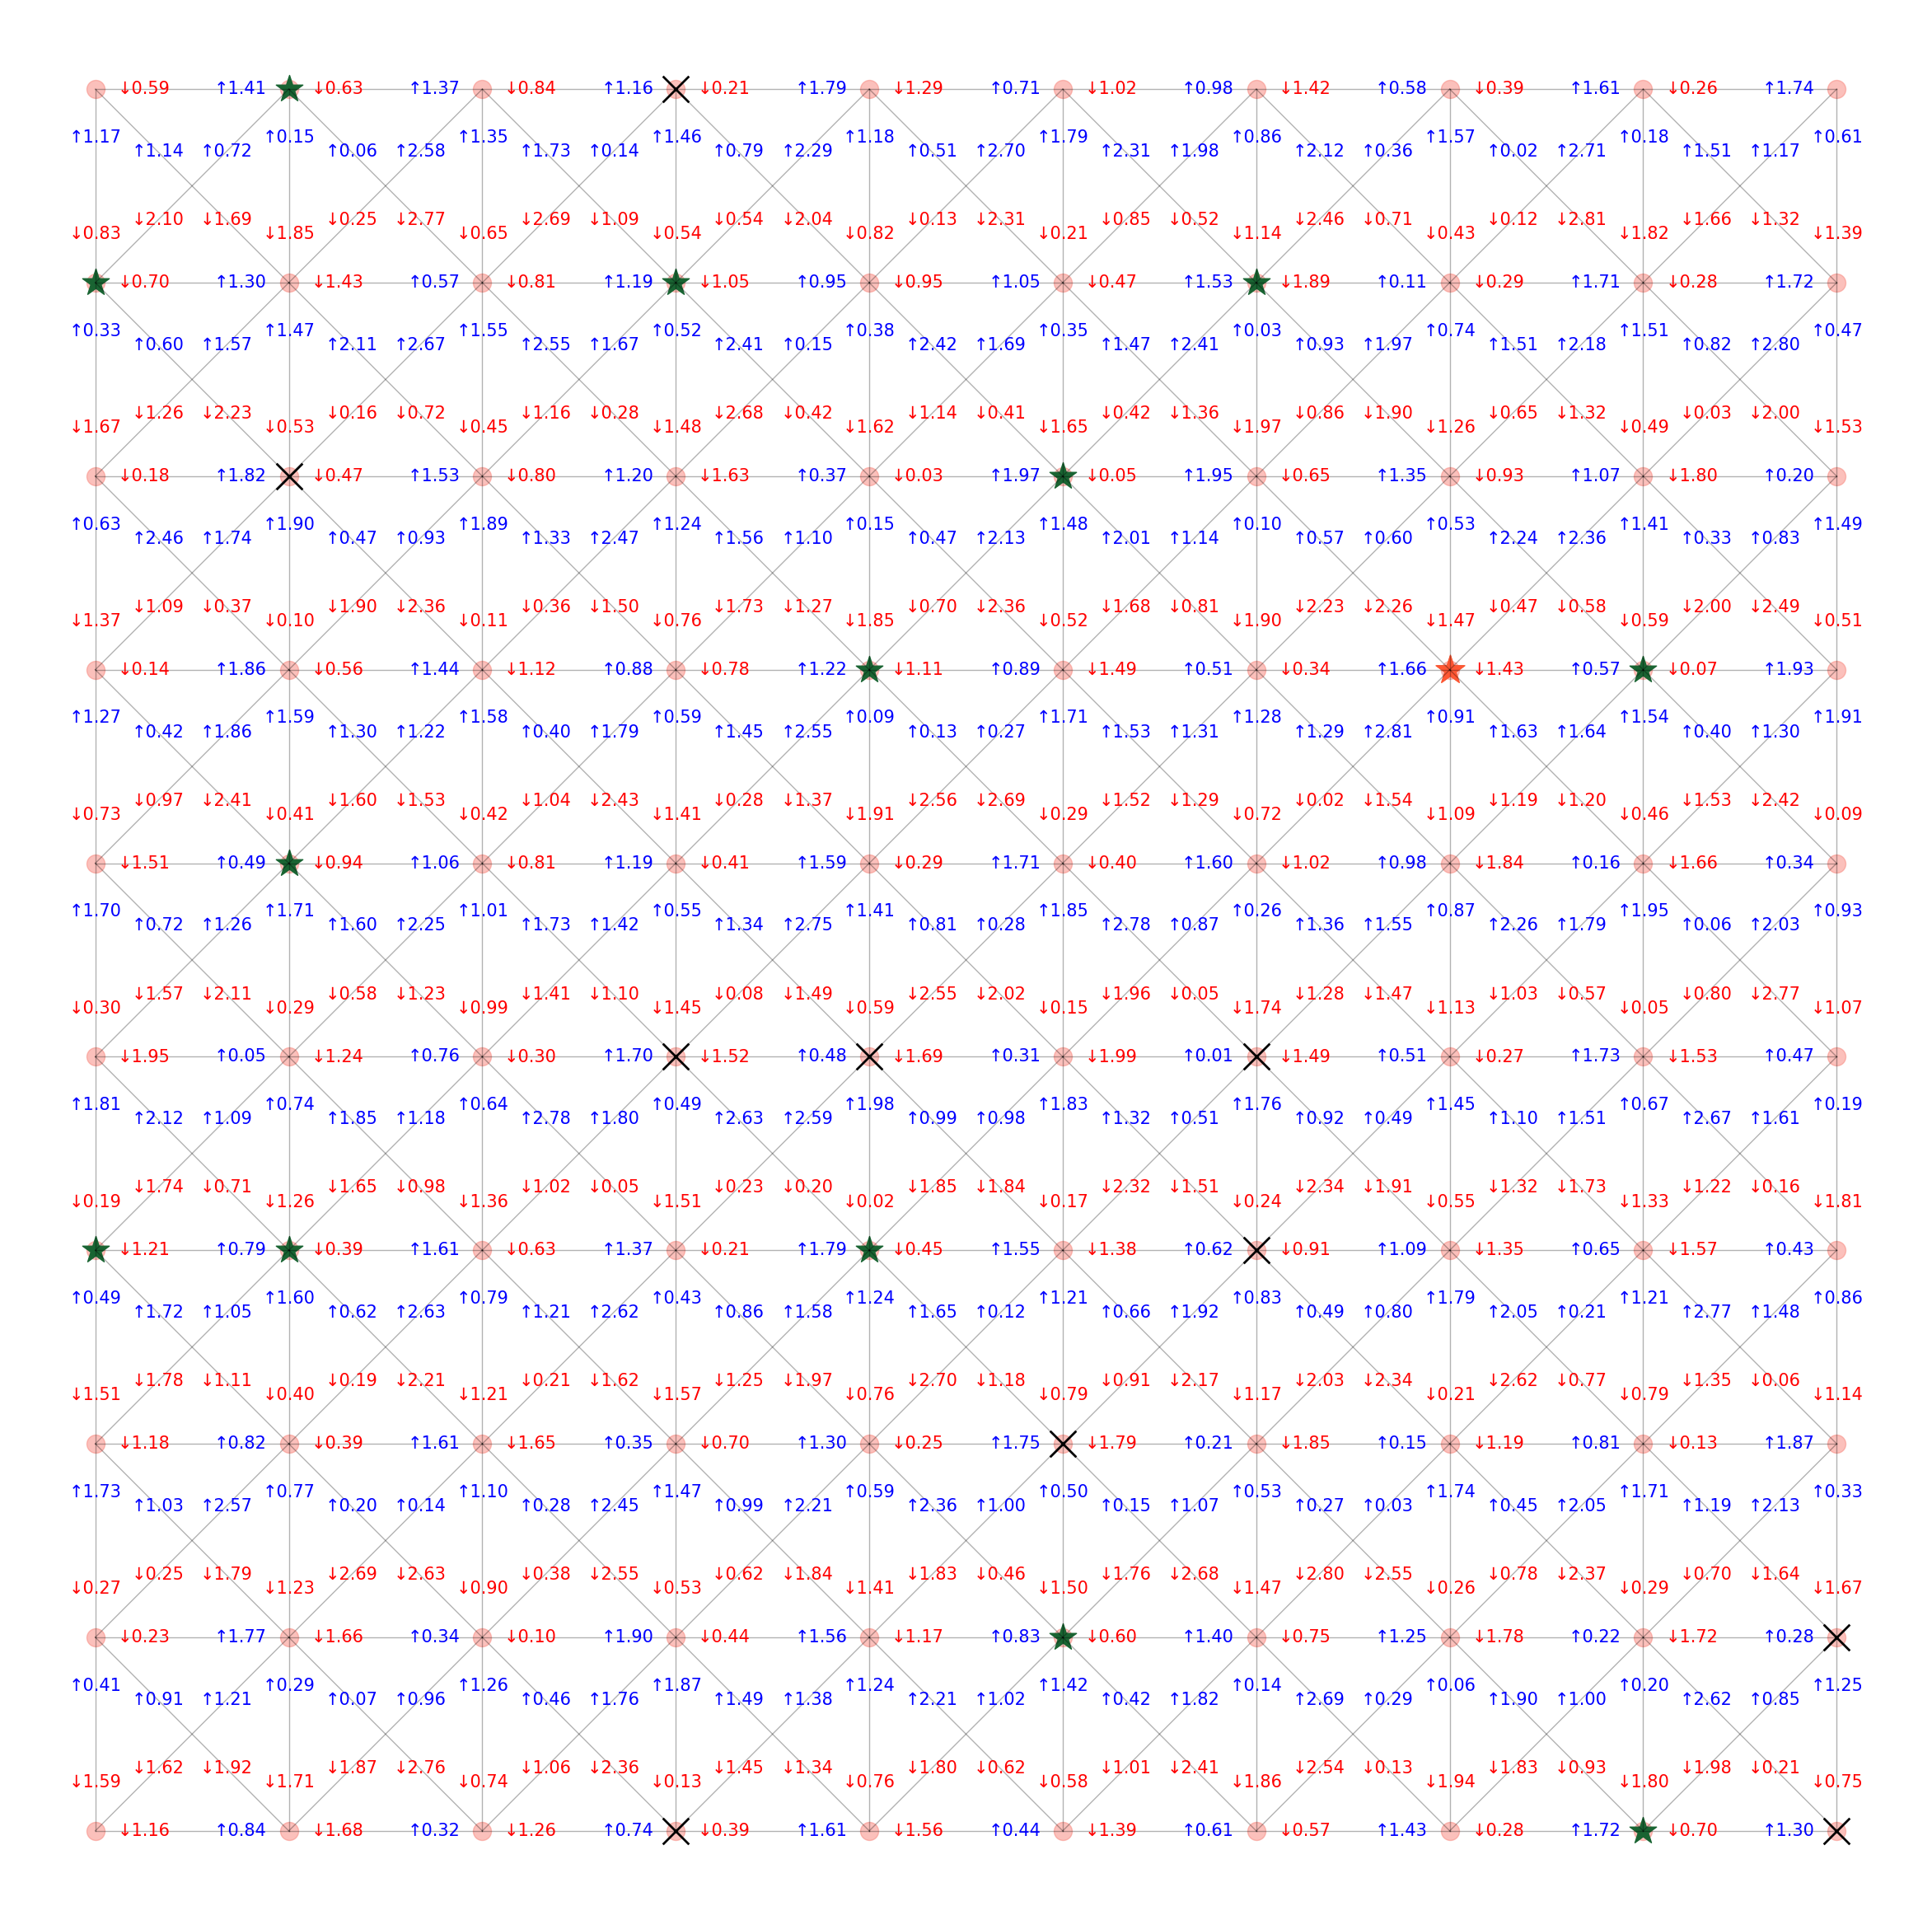

In [166]:
f = visualizeGridWithEdges(grid_data, port_num, port_of_origin_num, no_go_num, 0,c);

#### Normal Case: 

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL
(100, 100)


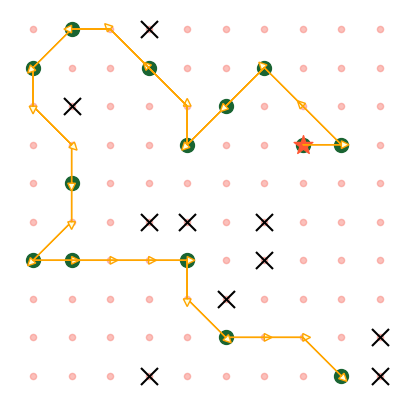

In [167]:
solver = Gurobi;
x_opt, z_opt, obj_opt = optModelMinCost(grid_data, port_num, port_of_origin_num, no_go_num, solver);

println(size(x_opt));
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

#### Edge-Boost Case:

(100, 100)


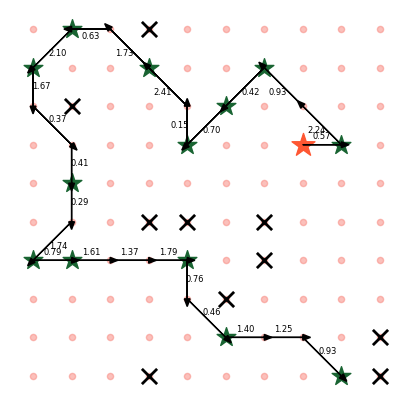

In [168]:
println(size(x_opt));
f = visualizeGridWithEdgesSol(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data, c);

**Results and Interpretation**

- The **Starting Coordinate grid** shows the full grid with upstream (blue) and downstream (red) edge costs.
- The **Final Optimized solution** displays the optimal path with arrowheads and cost labels.
- The ship prioritizes edges with beneficial boosts and avoids hindered edges, showcasing how local environmental variability shapes global routing decisions.

---

**Inference**

The model demonstrates how edge-level adjustments can significantly influence global optimization. This case highlights the importance of modeling realistic environmental factors (like ocean currents) to derive robust and adaptive solutions in network optimization problems.

---

# With Soft Port Priority Constraints:

#### Introduction

In this section, we focus on solving the **minimum cost ship routing problem with soft port priority constraints**.

We use the following key functions:

- **`optModelMinCostWithPrioritiesSoft`** → Optimizes the ship path by minimizing total travel distance while adding soft penalties if ports are visited out of priority order.

- **`generatePortPriorities`** → Dynamically generates a priority dictionary assigning ranks to ports (excluding the origin port).

- **`visualizeGridWithPriorities`** → Plots the grid with solution paths, ports, and priority labels.

- **`printVisitOrder`** → Prints the sequence in which ports are visited, as determined by the optimizer.

---

#### Task Description

We aim to minimize total travel distance, but we also **penalize** (via a soft constraint) the optimizer if it visits lower-priority ports before higher-priority ones.

We introduce a tunable penalty weight $\lambda$ (lambda) in the objective, which controls the importance of following priorities relative to minimizing distance.

---

#### Mathematical Model

We define:

- $x_{ij} \in \{0,1\}$ : whether we travel from node $i$ to $j$
- $u_i$ : ordering variable (for subtour elimination, Miller-Tucker-Zemlin constraints)
- $y_p$ : visit order index for port $p$
- $s_{pq} \geq 0$ : slack variable to penalize wrong priority order

The objective:

$$
\min \sum_{i,j} c_{ij} x_{ij} + \lambda \sum_{p,q} s_{pq}
$$

Subject to:

- **Flow constraints**:

$$
\sum_j x_{ij} - \sum_j x_{ji} =
\begin{cases}
1 & \text{if } i = \text{origin port} \\
0 & \text{if } i \neq \text{origin port, ports, no-go zones}
\end{cases}
$$

- **MTZ constraints**:

$$
u_i - u_j + N x_{ij} \leq N - 1
$$

- **Priority penalty constraints**:

$$
s_{pq} \geq y_p - y_q, \quad \text{if } \text{priority}(p) < \text{priority}(q)
$$

---

In [42]:
function optModelMinCostWithPrioritiesSoft(grid_data, port_num, port_of_origin_num, no_go_num, solver, port_priority, λ)
    n = Int(grid_data[1])
    spacing = grid_data[2]
    m = length(port_num)  # number of ports
    grid_size = n * n

    all_num = [i for i=0:grid_size-1]
    all_else_num = setdiff(all_num, union(port_num, no_go_num))

    model = Model()
    # @show 
    @variable(model, x[i=0:grid_size-1, j=0:grid_size-1], Bin)
    # @show 
    @variable(model, z[i=1:m], Bin)

    # MTZ to prevent loops
    # defined for all nodes
    @variable(model, u[i=0:grid_size-1] >= 0)
    @constraint(model, u[port_of_origin_num] == 0)
    
    @variable(model, y[p=1:m], Int)      # visit order variable
    @variable(model, s[p=1:m, q=1:m] >= 0)  # penalty slack variable


    # edge cost: euclidean norm
    c = zeros(grid_size, grid_size)
    cost = 0

    tol = 1e-5

    for i = 0:grid_size-1
        for j = 0:grid_size-1
            if i == j
                @constraint(model, x[i, j] == 0)
            end

            node_i = numToNode(i, n)
            node_j = numToNode(j, n)

            #Only allowing nearest 8 neighbors
            if abs(node_i[1] - node_j[1]) > 1 || abs(node_i[2] - node_j[2]) > 1
                @constraint(model, x[i, j] == 0)
            else
                base_distance = norm(numToCoord(i, n, spacing) - numToCoord(j, n, spacing))
                c[i+1, j+1] = base_distance
                cost += c[i+1, j+1] * x[i, j]

                #MTZ constraint for subtour elimination:
                @constraint(model, u[i] - u[j] + grid_size * x[i, j] <= grid_size - 1)
            end
        end
    end

    #Constraints for port of origin:
    sum_out_poo = sum(x[port_of_origin_num, j] for j=0:grid_size-1)
    sum_in_poo = sum(x[j, port_of_origin_num] for j=0:grid_size-1)
    @constraint(model, sum_out_poo == 1)
    @constraint(model, sum_out_poo - sum_in_poo == 1)

    #Constraints for other ports:
    sum_terminal = 0
    for p=1:m
        i = port_num[p]
        if i != port_of_origin_num
            sum_out_port = sum(x[i, j] for j=0:grid_size-1)
            sum_in_port = sum(x[j, i] for j=0:grid_size-1)

            @constraint(model, sum_out_port >= -1*z[p] + 1*(1-z[p]))
            @constraint(model, sum_out_port <= 2*(1-z[p]))
            @constraint(model, sum_in_port == 1)
            @constraint(model, sum_out_port - sum_in_port <= 0)

            sum_terminal += z[p]
        end
    end
    @constraint(model, sum_terminal == 1)

    #Constraints for no-go zones:
    for g=1:length(no_go_num)
        i = no_go_num[g]
        sum_in = sum(x[j, i] for j=0:grid_size-1)
        sum_out = sum(x[i, j] for j=0:grid_size-1)
        @constraint(model, sum_in == 0)
        @constraint(model, sum_out == 0)
    end

    #Flow conservation:
    for a=1:length(all_else_num)
        i = all_else_num[a]
        sum_out = sum(x[i, j] for j=0:grid_size-1)
        sum_in = sum(x[j, i] for j=0:grid_size-1)
        @constraint(model, sum_out - sum_in == 0)
    end

    #Priority Order Penalty Constraints:
    for p=1:m
        for q=1:m
            #Only compare if both p and q are visiting ports (i.e. not the origin)
            if port_num[p] != port_of_origin_num && port_num[q] != port_of_origin_num
                if port_priority[port_num[p]] < port_priority[port_num[q]]
                    @constraint(model, s[p, q] >= y[p] - y[q])
                end
            end
        end
    end


    #Visit order must be valid:
    for p=1:m
        if port_num[p] != port_of_origin_num
            @constraint(model, 1 <= y[p] <= m-1)
        end
    end

    #Final objective:
    @objective(model, Min, cost + λ * sum(
    s[p, q] for p=1:m, q=1:m 
    if port_num[p] != port_of_origin_num && port_num[q] != port_of_origin_num &&
       port_priority[port_num[p]] < port_priority[port_num[q]]
    ))


    set_optimizer(model, solver.Optimizer)
    set_silent(model)
    optimize!(model)

    try
        x_opt = JuMP.value.(x)
        z_opt = JuMP.value.(z)
        y_opt = JuMP.value.(y)
        s_opt = JuMP.value.(s)
        obj_opt = objective_value(model)

        println(termination_status(model))

        return x_opt, z_opt, y_opt, s_opt, obj_opt, model, c
    catch
        error("Model did not optimize!")
    end
end

optModelMinCostWithPrioritiesSoft (generic function with 1 method)

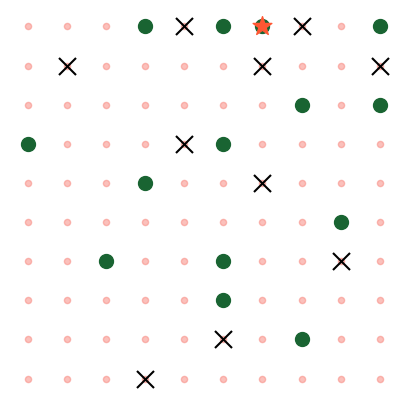

In [304]:
### Grid setup
# grid size (square)
n = 10;
spacing = 1; # always keep 1?
### port information
# number of ports on grid
m = 14;
### no-go zones
k = 10;
grid_data = initializeParam_(n, spacing, m, k);
port_num, port_of_origin_num, no_go_num = randomizePortsNoRepeat(grid_data)
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, 0);

#### Normal Case:

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL
(100, 100)


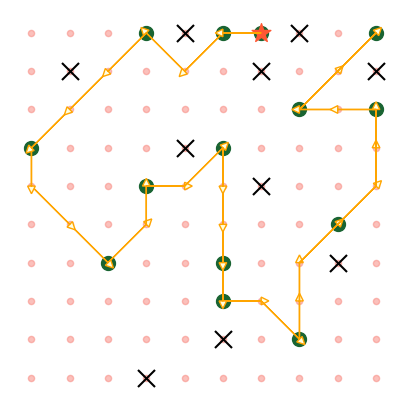

In [305]:
solver = Gurobi;
x_opt, z_opt, obj_opt = optModelMinCost(grid_data, port_num, port_of_origin_num, no_go_num, solver);
println(size(x_opt));
f = visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data);

#### Soft port constraints case:

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
OPTIMAL
(100, 100)


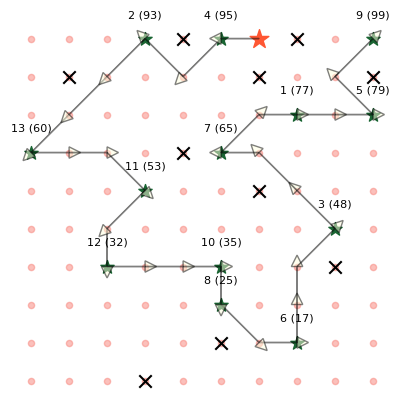

In [306]:
solver = Gurobi

#Generating priorities dynamically:
port_priority = generatePortPriorities(port_num, port_of_origin_num)
#Penalty term:
λ = 1000000000000

x_opt, z_opt, y_opt, s_opt, obj_opt, model, c = optModelMinCostWithPrioritiesSoft(
    grid_data, port_num, port_of_origin_num, no_go_num, solver, port_priority, λ)

println(size(x_opt))
f = visualizeGridWithPriorities(
    grid_data, port_num, port_of_origin_num, no_go_num, x_opt.data, port_priority)
show()

#### Interpretation of Results

Looking at the two figures:

- **Yellow arrows (without priority constraints)** → The optimizer purely minimizes distance, often taking efficient loops without regard for priority.

- **Black arrows (with soft priority constraints)** → With the soft penalty, the optimizer prefers visiting higher-priority ports earlier, even if it slightly increases the travel cost.

From the `printVisitOrder` output:

- We see two clear clusters:
    - Ports visited early $(\text{order} = 1)$ → high-priority ports.
    - Ports visited later $(\text{order} = 13)$ → low-priority ports.

This confirms that the penalty system **nudged** the optimizer to respect priorities without strictly enforcing them.

---

#### Key Takeaways

* Soft priorities allow balancing distance and sequence flexibility.
* Tuning $\lambda$ helps control how strict or relaxed the priority enforcement is.
* The penalty approach enables the optimizer to **trade off** cost vs. priority compliance, useful when real-world operations face exceptions.

---

### Tradeoff Analysis between Minimizing Cost and Maximizing Profit:

#### Introduction

In this section, we perform a tradeoff analysis between two competing objectives in our ship routing optimization problem:
- **Minimizing total distance traveled**
- **Maximizing total profit from visiting ports**

The goal is to understand how the ship’s route changes as we adjust the importance (weight) of profit relative to distance using a tradeoff parameter $\lambda$. We solve the optimization model under multiple $\lambda$ values and analyze how the balance between profit and distance shifts.

---

#### Functions Description

- `tradeoffAnalysis` → runs the optimization model over a range of $\lambda$ values, collecting profit and distance results.
- `plotTradeoff` → plots the tradeoff curve (profit vs. distance) and highlights the best-performing $\lambda$.
- `visualizeSolutions` → displays the actual grid and ship routes for selected $\lambda$ values to visualize how the ship’s strategy adapts.

---

#### Mathematical Model

We formulate the problem as a **Mixed Integer Program (MIP)**.

**Decision variables**:
- $x_{ij}$ → binary, equals 1 if the ship travels from node $i$ to node $j$
- $w_p$ → binary, equals 1 if port $p$ is visited
- $u_i$ → continuous, MTZ ordering variable to prevent subtours

---

**Objective function**:
$
\max \sum_{p \in P} \text{profit}_p \cdot w_p - \lambda \sum_{i,j} c_{ij} \cdot x_{ij}
$

Where:
- $c_{ij}$ → Euclidean distance (with possible speed boost/hindrance)
- $\lambda$ → tradeoff parameter controlling profit vs. distance weight

---

**Constraints**:
- Flow conservation:
$
\sum_j x_{ij} - \sum_j x_{ji} = 0 \quad \forall i \notin \{\text{origin}, \text{sink}\}
$
- Visit port at most once:
$
\sum_j x_{ij} \leq 1, \quad \sum_j x_{ji} \leq 1
$
- No-go zones:
$
\sum_j x_{ij} = 0, \quad \sum_j x_{ji} = 0 \quad \forall i \in \text{no-go zones}
$
- MTZ subtour elimination:
$
u_i - u_j + n \cdot x_{ij} \leq n - 1
$

---

#### Solution

We implemented the model in Julia using JuMP and Gurobi.

We looped over a range of $\lambda$ values:
```julia
lambdas = [0, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]


In [111]:
function tradeoffAnalysis(grid_data, port_num, port_of_origin_num, no_go_num, port_profit, solver, lambdas)
    n = grid_data[1]
    grid_size = n^2
    spacing = grid_data[2]
    all_num = [i for i=0:grid_size-1]
    all_else_num = setdiff(all_num, union(port_num, no_go_num))
    results = []
    solutions = []

    for λ in lambdas
        model = Model(solver.Optimizer)
        @variable(model, x[i=0:grid_size-1, j=0:grid_size-1], Bin)
        @variable(model, u[i=0:grid_size-1] >= 0)
        @variable(model, w[p=1:length(port_num)], Bin)

        c = zeros(grid_size, grid_size)
        cost = 0.0
        profit = 0.0

        for i = 0:grid_size-1, j = 0:grid_size-1
            if i == j
                @constraint(model, x[i, j] == 0)
            end
            @constraint(model, u[i] - u[j] + grid_size * x[i, j] <= grid_size - 1)
            c[i+1, j+1] = norm(numToCoord(i, n, spacing) - numToCoord(j, n, spacing))
            cost += c[i+1, j+1] * x[i, j]
            if c[i+1, j+1] > sqrt(2) + 1e-5
                @constraint(model, x[i, j] == 0)
            end
        end

        sum_out_poo = sum(x[port_of_origin_num, j] for j=0:grid_size-1)
        sum_in_poo = sum(x[j, port_of_origin_num] for j=0:grid_size-1)
        @constraint(model, sum_out_poo == 1)
        @constraint(model, sum_out_poo - sum_in_poo == 1)

        for p=1:length(port_num)
            i = port_num[p]
            if i != port_of_origin_num
                sum_in = sum(x[j, i] for j=0:grid_size-1)
                sum_out = sum(x[i, j] for j=0:grid_size-1)
                @constraint(model, [j=0:grid_size-1], x[i, j] + x[j, i] <= 1)
                @constraint(model, sum_in - 1 <= 100 * w[p])
                @constraint(model, sum_in >= w[p])
                @constraint(model, sum_out - sum_in <= 0)
            else
                @constraint(model, w[p] == 0)
            end
        end

        for g in no_go_num
            sum_in = sum(x[j, g] for j=0:grid_size-1)
            sum_out = sum(x[g, j] for j=0:grid_size-1)
            @constraint(model, sum_in == 0)
            @constraint(model, sum_out == 0)
        end

        for i in all_else_num
            sum_in = sum(x[j, i] for j=0:grid_size-1)
            sum_out = sum(x[i, j] for j=0:grid_size-1)
            @constraint(model, sum_in == sum_out)
        end

        for p=1:length(port_num)
            profit += port_profit[p] * w[p]
        end

        @objective(model, Max, profit - λ * cost)
        optimize!(model)

        obj_profit = try value(profit) catch; 0.0 end
        obj_cost = try value(cost) catch; 0.0 end
        x_opt = try value.(x) catch; zeros(grid_size, grid_size) end

        push!(results, (λ, obj_profit, obj_cost))
        push!(solutions, x_opt)
    end

    return results, solutions
end


tradeoffAnalysis (generic function with 1 method)

In [114]:
function plotTradeoff(results)
    lambdas = [r[1] for r in results]
    profits = [r[2] for r in results]
    costs = [r[3] for r in results]

    figure()
    plot(costs, profits, "o-", label="Tradeoff curve")
    xlabel("Total Distance")
    ylabel("Total Profit")
    title("Tradeoff Curve: Profit vs. Distance")
    grid(true)

    # Find best lambda (highest profit/distance ratio)
    ratios = profits ./ costs
    best_idx = argmax(ratios)
    scatter([costs[best_idx]], [profits[best_idx]], color="red", s=100, label="Best λ = $(lambdas[best_idx])")
    legend()
    show()
end

plotTradeoff (generic function with 1 method)

In [115]:
function visualizeSolutions(grid_data, port_num, port_of_origin_num, no_go_num, solutions, lambdas)
    selected_indices = [1,4, 8, 10, 14]
    for idx in selected_indices
        println("Visualizing λ = $(lambdas[idx])")
        soln = solutions[idx]
        if hasproperty(soln, :data)
            soln_matrix = soln.data
        else
            soln_matrix = soln
        end
        visualizeGrid(grid_data, port_num, port_of_origin_num, no_go_num, soln_matrix)
        show()
    end
end


visualizeSolutions (generic function with 1 method)

In [113]:
lambdas = [0, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
port_profit = randomizePortProfit(grid_data, 50, 200)
solver = Gurobi

results, solutions = tradeoffAnalysis(
    grid_data, port_num, port_of_origin_num, no_go_num, port_profit, solver, lambdas
)

Set parameter Username
Set parameter LicenseID to value 2656577
Academic license - for non-commercial use only - expires 2026-04-24
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[x86] - Darwin 23.6.0 23H527)

CPU model: Intel(R) Core(TM) i5-1038NG7 CPU @ 2.00GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20754 rows, 10114 columns and 64250 nonzeros
Model fingerprint: 0xbb18a2b7
Variable types: 100 continuous, 10014 integer (10014 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [7e+01, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 12380 rows and 9465 columns
Presolve time: 0.11s
Presolved: 8374 rows, 649 columns, 18276 nonzeros
Variable types: 91 continuous, 558 integer (558 binary)
Found heuristic solution: objective 147.5277212

Root relaxation: objective 1.711289e+03, 240 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Curre

(Any[(0.0, 1711.288585629863, 43.52691193458117), (0.01, 1711.288585629863, 33.14213562373095), (0.05, 1711.288585629863, 28.72792206135786), (0.1, 1711.288585629863, 28.72792206135786), (0.5, 1711.288585629863, 28.55634918610405), (1.0, 1711.288585629863, 28.55634918610405), (5.0, 1711.288585629863, 28.55634918610405), (10.0, 1711.288585629863, 28.55634918610405), (50.0, 1372.6532168334998, 20.071067811865476), (100.0, 407.55737954637004, 5.414213562373095), (500.0, 153.13038662919234, 3.0), (1000.0, 153.13038662919234, 3.0), (5000.0, 153.13038662919234, 3.0), (10000.0, 153.13038662919234, 3.0)], Any[2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, 0:99
    Dimension 2, 0:99
And data, a 100×100 Matrix{Float64}:
  0.0  -0.0   0.0  0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -0.0   0.0  -0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -0.0   0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  0.0   0.

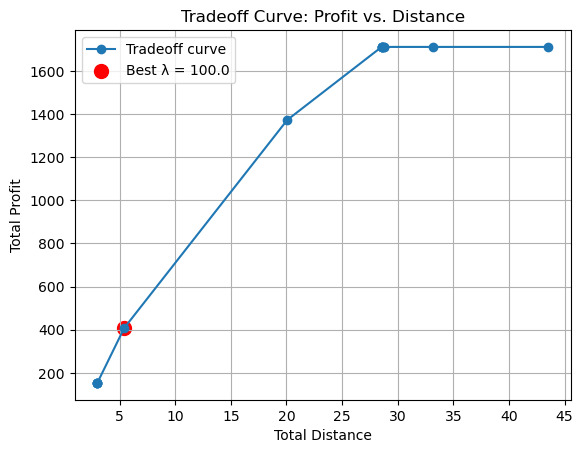

In [116]:
plotTradeoff(results)

Visualizing λ = 0.0
Visualizing λ = 0.1
Visualizing λ = 10.0
Visualizing λ = 100.0
Visualizing λ = 10000.0


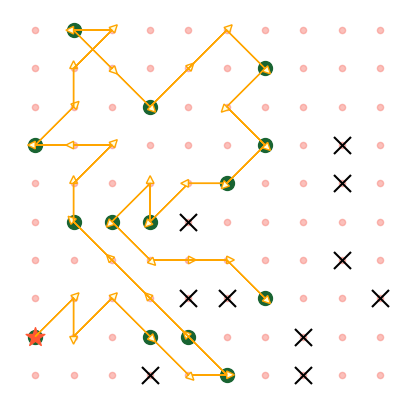

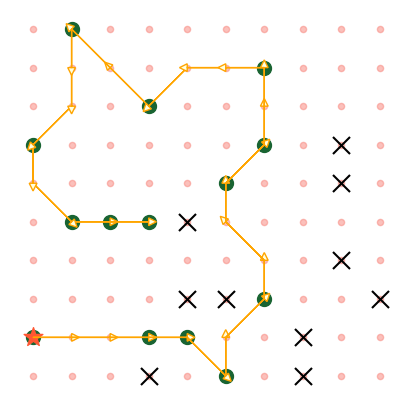

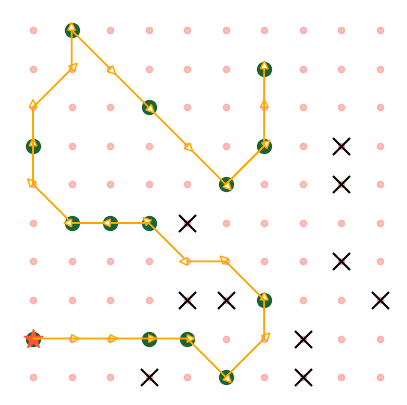

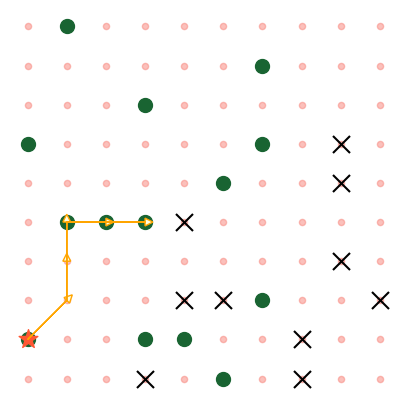

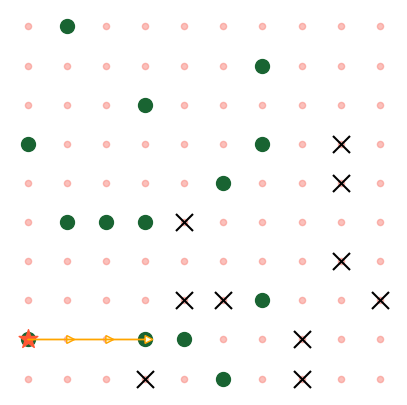

In [117]:
visualizeSolutions(
    grid_data, port_num, port_of_origin_num, no_go_num, solutions, lambdas
)

### Results and Discussion:

#### **Tradeoff curve interpretation:**

* The curve shows a clear pattern:
    * At low λ → profit-maximizing solutions, even at high distance
    * As λ increases → the solution sacrifices profit to reduce distance
    * Beyond a certain λ (around 100), the system flattens → no extra distance savings but profit drops
----
#### **Best λ:**

* The red marker shows the best balance point.
* In this run, λ=100 gave the best tradeoff between profit and distance.
----
#### **Route visualizations:**

* At small λ, the ship takes longer but highly profitable routes.
* At large λ, it skips ports to minimize distance.
* This visually explains the shape and flattening of the curve.